## Loading the dataset and selecting K best features

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
#to draw the graph
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus 

In [4]:
df = pd.read_csv("divorce.csv", sep = ';')
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [5]:
X = df
X.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [7]:
X = X.drop(["Class"], axis = 1)
X.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0


In [8]:
y = df["Class"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [32]:
X_new = SelectKBest(score_func = f_classif, k=9).fit_transform(X, y)
X_new

ValueError: k should be >=0, <= n_features = 8; got 9. Use k='all' to return all features.

In [24]:
X = X_new

## Splitting the dataset

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Logistic Regression

In [29]:
lr = LogisticRegression()

In [58]:
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("R2 Score:", metrics.r2_score(y_test, y_pred_lr))
print("Precision, Recall and F-Score:")
print(precision_recall_fscore_support(y_test, y_pred_lr, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred_lr, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred_lr, average='weighted'))

R2 Score: 0.7638888888888888
Precision, Recall and F-Score:
(0.9444444444444444, 0.9444444444444444, 0.9411764705882353, None)
(0.9411764705882353, 0.9411764705882353, 0.9411764705882353, None)
(0.9477124183006536, 0.9411764705882353, 0.9411764705882353, None)


In [51]:
y_pred_lr

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

## KNN

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)

In [59]:
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("R2 Score:", metrics.r2_score(y_test, y_pred_knn))
print("Precision, Recall and F-Score:")
print(precision_recall_fscore_support(y_test, y_pred_knn, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred_knn, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred_knn, average='weighted'))

R2 Score: 0.7638888888888888
Precision, Recall and F-Score:
(0.9444444444444444, 0.9444444444444444, 0.9411764705882353, None)
(0.9411764705882353, 0.9411764705882353, 0.9411764705882353, None)
(0.9477124183006536, 0.9411764705882353, 0.9411764705882353, None)


In [60]:
y_pred_knn

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

## Decision Tree

In [62]:
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

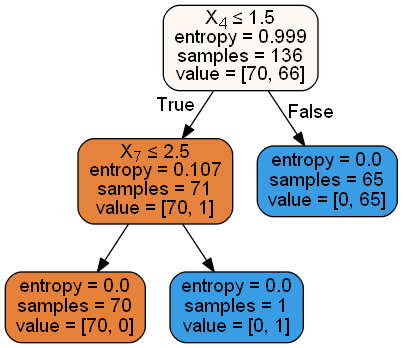

In [64]:
from graphviz import *
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width = 500, height = 500)

In [67]:
y_pred_tree = tree.predict(x_test)
print("R2 Score:", metrics.r2_score(y_test, y_pred_tree))
print("Precision, Recall and F-Score:")
print(precision_recall_fscore_support(y_test, y_pred_tree, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred_tree, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred_tree, average='weighted'))

R2 Score: 0.7638888888888888
Precision, Recall and F-Score:
(0.9444444444444444, 0.9444444444444444, 0.9411764705882353, None)
(0.9411764705882353, 0.9411764705882353, 0.9411764705882353, None)
(0.9477124183006536, 0.9411764705882353, 0.9411764705882353, None)


In [68]:
y_pred_tree

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)